## Genesis Set Permission Tree Data Collection
### Using https://github.com/0L-Analytics/permission-tree-monitoring API for Permission Tree of Validators on 0L
#### Credit to: https://github.com/0L-Analytics/permission-tree-monitoring/commits?author=agouin for building the API

### Shows relationship of Genesis Set to their first generation validators

In [3]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from datetime import datetime

from utils import (
    get_permission_tree, 
    get_epoch, 
    get_validator_addresses, 
    depth_of_hierarchy,
    build_graph
)

### Get validator addresses from the api and write them to a file for future use

In [2]:
# ONLY RUN THIS IF YOU KNOW NEW VALIDATORS HAVE BEEN CREATED. IT TAKES A WHILE.
address_list = get_validator_addresses(in_active_set=False)

path = '../assets/generated/new_address_list.json'

with open(path, 'w') as outfile:
    json.dump(address_list, outfile)

print(address_list)

['012338b54ba4625adcc313394d87819c', '987d7486a6db70993eeab79124bc6606', '987be6e871faeedfe255b4305b4c6d02', '6a9f0fa0b6bd687f4343d8880b40f697', 'd67f3ff22bd719eb5be2df6577c9b42d', '012345062ce76e68f1ac6d5506527aa1', 'e77ddb76c9afcb3d5511e46cbc89023d', '4c95e7b998b4e66ef666fe12930a4d5c', '4b08c148f5e80962be1e5755f0d2ed29', '7e56b29cb23a49368be593e5cfc9712e', '56641e58aba97fa6b7ea833f83444392', '304a03c0b4acdfdce54bfaf39d4e0448', 'd96e89e270a5273d94bc8ab7953754f9', '70a016df0643121bfc80ef1c87e4c189', 'b295da228c6808199d92dc813975755c', 'd1c9ce9308b0bdc6dc2ba6a7b5da8c2b', 'bdb8ad37341cec0817fd8e2474e25031', '86ea91e266287d11011f5c0b3963d2ea', '34e5addec49ded4cc638dad8cd992858', '79d2a77b01e5cde1a5fb123119424acb', '63bb637e57bf088b129bcf1bfd93ebf4', '7ec16859c24200d8e074809d252ac740', 'c0a1f4d49658cf2fe5402e10f496bb80', '779fd01dfe608a4288b4b514d17da48b', '756d518db499a22c1dad0e2ee353c21d', 'ecaf65add1b785b0495e3099f4045ec0', '351f3c360630f790de10570c0a224b06', '46a7a744b5d33c47f6b20766f8

### Load validator addresses

In [4]:
# create a list of all nodes, which is basically the address list... :)
path = '../assets/generated/new_address_list.json'

nodes = []
with open(path, 'r') as infile:
    nodes = json.load(infile)

print(nodes)

['012338b54ba4625adcc313394d87819c', '987d7486a6db70993eeab79124bc6606', '987be6e871faeedfe255b4305b4c6d02', '6a9f0fa0b6bd687f4343d8880b40f697', 'd67f3ff22bd719eb5be2df6577c9b42d', '012345062ce76e68f1ac6d5506527aa1', 'e77ddb76c9afcb3d5511e46cbc89023d', '4c95e7b998b4e66ef666fe12930a4d5c', '4b08c148f5e80962be1e5755f0d2ed29', '7e56b29cb23a49368be593e5cfc9712e', '56641e58aba97fa6b7ea833f83444392', '304a03c0b4acdfdce54bfaf39d4e0448', 'd96e89e270a5273d94bc8ab7953754f9', '70a016df0643121bfc80ef1c87e4c189', 'b295da228c6808199d92dc813975755c', 'd1c9ce9308b0bdc6dc2ba6a7b5da8c2b', 'bdb8ad37341cec0817fd8e2474e25031', '86ea91e266287d11011f5c0b3963d2ea', '34e5addec49ded4cc638dad8cd992858', '79d2a77b01e5cde1a5fb123119424acb', '63bb637e57bf088b129bcf1bfd93ebf4', '7ec16859c24200d8e074809d252ac740', 'c0a1f4d49658cf2fe5402e10f496bb80', '779fd01dfe608a4288b4b514d17da48b', '756d518db499a22c1dad0e2ee353c21d', 'ecaf65add1b785b0495e3099f4045ec0', '351f3c360630f790de10570c0a224b06', '46a7a744b5d33c47f6b20766f8

### Fetch permission tree and write to file

In [4]:
# ONLY RUN THIS IF YOU KNOW NEW VALIDATORS HAVE BEEN CREATED. 
# IT TAKES A WHILE AND MIGHT FAIL ON CONNECTION ERRORS. KEEP TRYING ;)
# fetch the permission tree
genesis_tree = get_permission_tree(nodes)

print(genesis_tree)

# write to file
with open('../assets/generated/full_genesis_tree.json', 'w') as outfile:
    json.dump(genesis_tree, outfile)

ConnectionError: HTTPSConnectionPool(host='0l.interblockcha.in', port=444): Max retries exceeded with url: /permission-tree/validator/a35ae41a5f1701fcb67f4e4cad59d259 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7b32233e78e0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

### Get all the validator nodes that have been stored in a file in the previous step.

In [5]:
path = '../assets/generated/full_genesis_tree.json'

genesis_tree = []
with open(path, 'r') as infile:
    genesis_tree = json.load(infile)
    
# print number of validator addresses in the list
print(len(genesis_tree))

162


### Check the max depth

In [6]:
max_depth = depth_of_hierarchy(genesis_tree)

print(max_depth)

8


### Load genesis tree from file

In [7]:
path = '../assets/generated/full_genesis_tree.json'

genesis_tree = []
with open(path, 'r') as infile:
    genesis_tree = json.load(infile)

### Puts into a list and but preserves the extra address key

In [8]:
# unfertile_nodes = [values for values in genesis_tree.values() if len(values['children'])==0]

# print(len(unfertile_nodes))
# print(unfertile_nodes)

genesis_only = [values for values in genesis_tree.values() if values['parent']=='00000000000000000000000000000000']

print(len(genesis_only))
print(genesis_only)

19
[{'address': 'd67f3ff22bd719eb5be2df6577c9b42d', 'operator_address': '55171e51b261d902964dd128a057c23a', 'parent': '00000000000000000000000000000000', 'epoch_onboarded': 0, 'version_onboarded': 0, 'generation': 0, 'children': [{'address': '50040b551a28645e5c684a646db8e646', 'operator_address': 'ae4582dda8cc5601d6c81b4a27a46b58', 'parent': 'd67f3ff22bd719eb5be2df6577c9b42d', 'epoch_onboarded': 20, 'version_onboarded': 4960325, 'generation': 1}, {'address': 'ba28f081de02fc6cc3bf9879d6033911', 'operator_address': 'c001106b430f2660732102f2875d1059', 'parent': 'd67f3ff22bd719eb5be2df6577c9b42d', 'epoch_onboarded': 47, 'version_onboarded': 11456602, 'generation': 1}]}, {'address': '7e56b29cb23a49368be593e5cfc9712e', 'operator_address': '4d18b6f0481115ea32c96b81d4c35041', 'parent': '00000000000000000000000000000000', 'epoch_onboarded': 0, 'version_onboarded': 0, 'generation': 0, 'children': [{'address': '0ef85e1723530edd76f2bb13614ac5c5', 'operator_address': 'c6c3414f37d81f68f8447ddfeaf588

### Let's build the graph

In [9]:
G = nx.DiGraph()

for node in genesis_only:
    build_graph(G, node['address'], genesis_tree)

# Print all nodes and edges
# print("Nodes:", G.nodes)
# print("Edges:", G.edges)

# print("Degree of each node:", nx.degree(G))

### Get epoch

In [10]:
epoch_list = get_epoch()
current_epoch = epoch_list[0]['epoch']
print(current_epoch)

448


### Time to draw!

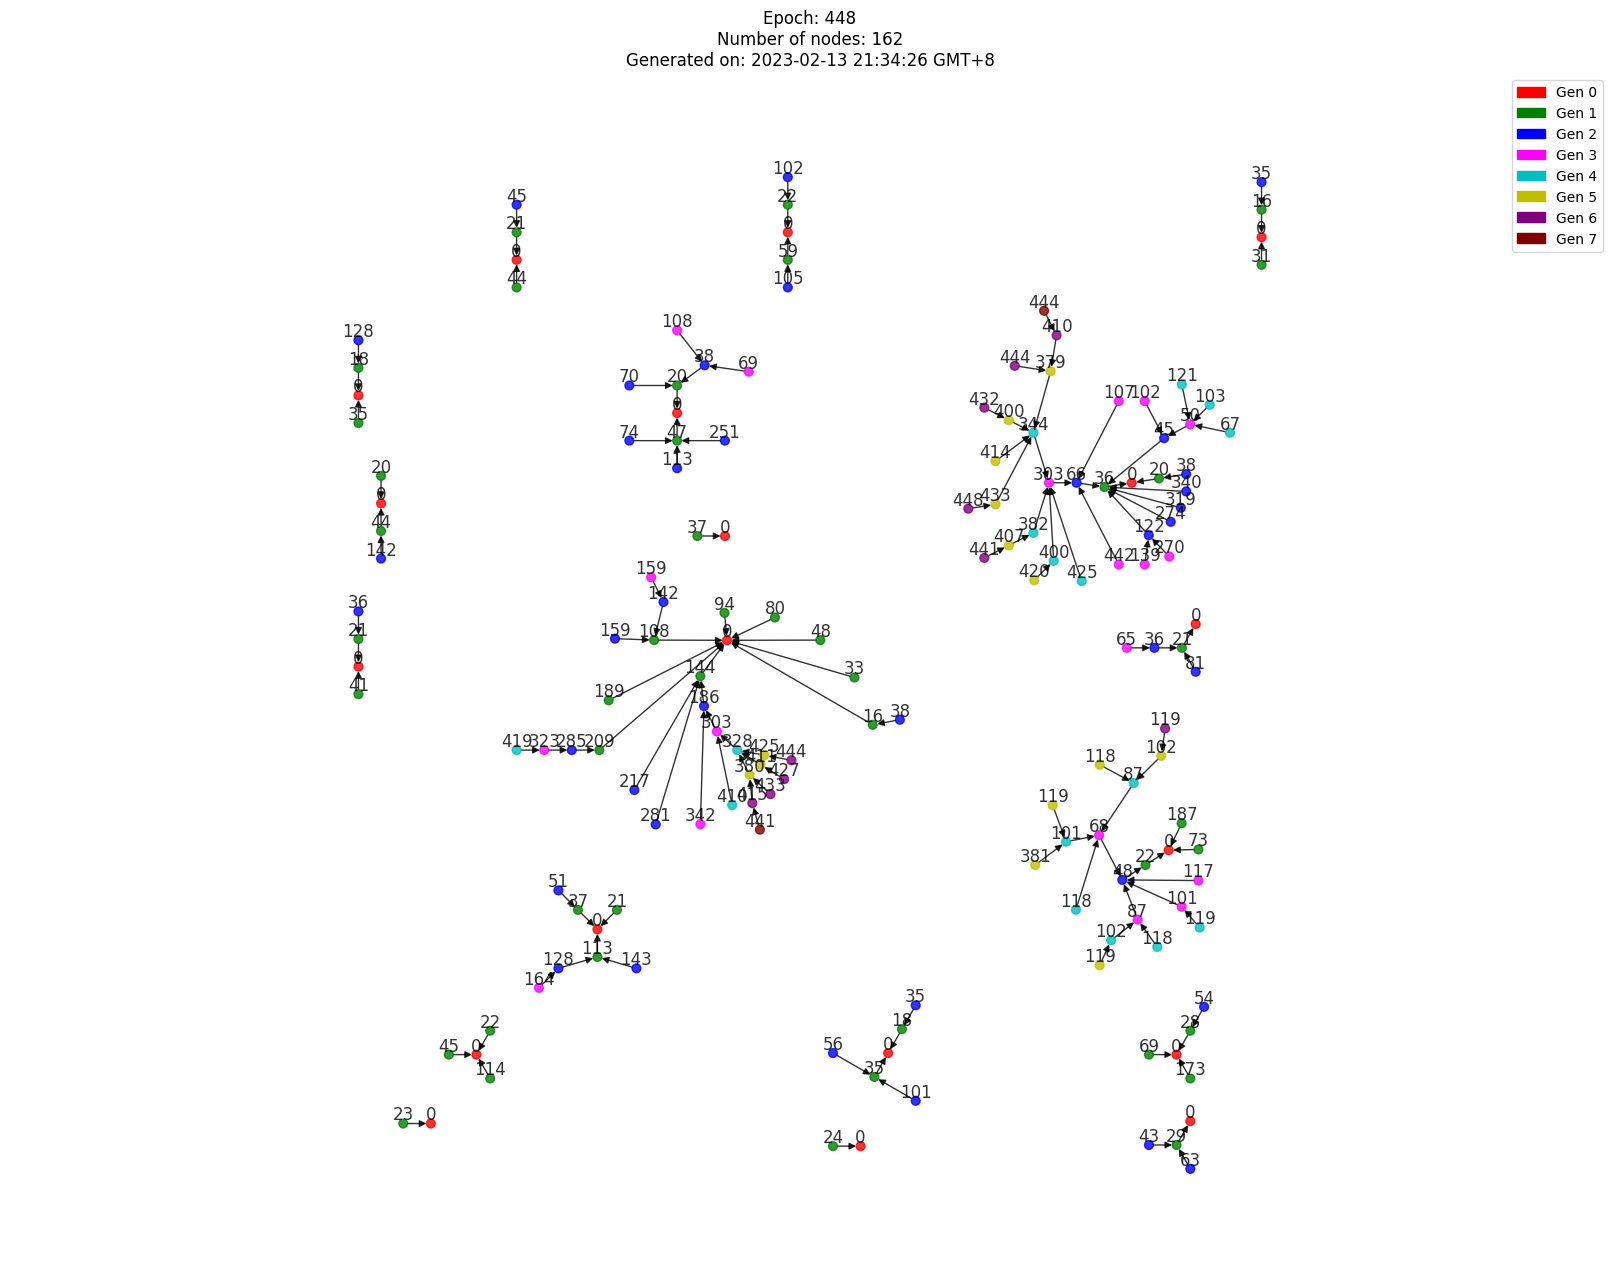

In [96]:
# available colors can be found here: https://matplotlib.org/stable/gallery/color/named_colors.html
color_map = [
    'red' if G.nodes[node]['epoch_onboarded'] == 0 else 
    'green' if G.nodes[node]['generation'] ==1 else 
    'blue' if G.nodes[node]['generation'] ==2 else 
    'magenta' if G.nodes[node]['generation'] ==3 else 
    'c' if G.nodes[node]['generation'] ==4 else
    'y' if G.nodes[node]['generation'] ==5 else
    'purple' if G.nodes[node]['generation'] ==6 else
    'maroon' for node in G]

red_patch = mpatches.Patch(color='red', label='Gen 0')
green_patch = mpatches.Patch(color='green', label='Gen 1')
blue_patch = mpatches.Patch(color='blue', label='Gen 2')
magenta_patch = mpatches.Patch(color='magenta', label='Gen 3')
cyan_patch = mpatches.Patch(color='c', label='Gen 4')
y_patch = mpatches.Patch(color='y', label='Gen 5')
gen6 = mpatches.Patch(color='purple', label='Gen 6')
gen7 = mpatches.Patch(color='maroon', label='Gen 7')

# def get_label(node):
#     return node[1]['epoch_onboarded']

# G = nx.relabel_nodes(G, get_label)
# G = nx.relabel_nodes(G, lambda x: x[0:5])

labels = nx.get_node_attributes(G, 'epoch_onboarded') 

# docs on attributes: https://graphviz.org/doc/info/attrs.html
# -Gsplines=true -Goverlap=scalexy -Grankdir=RL -Gepsilon=5 -Grankdir=LR -Gnodesep=1.6
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="") 
# pos = nx.spring_layout(G, k=0.15, iterations=20)
plt.figure(figsize=(16, 12))
nx.draw(G, pos, labels=labels, node_size=40, verticalalignment='bottom', alpha=0.8, node_color=color_map, with_labels=True)
plt.axis("equal")

plt.title(f'Epoch: {current_epoch}\nNumber of nodes: {G.number_of_nodes()}\nGenerated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} GMT+8')
plt.legend(handles=[red_patch, green_patch, blue_patch, magenta_patch, cyan_patch, y_patch, gen6, gen7])
plt.savefig(f"../assets/generated/validatorset_{current_epoch}.png", bbox_inches='tight')
plt.show()